<a href="https://colab.research.google.com/github/pranauww/Tensorflow/blob/main/ImageIdentifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import datetime
from tensorflow.keras import layers

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
Y_train.shape

(50000, 1)

In [9]:
Y_test.shape

(10000, 1)

[1]


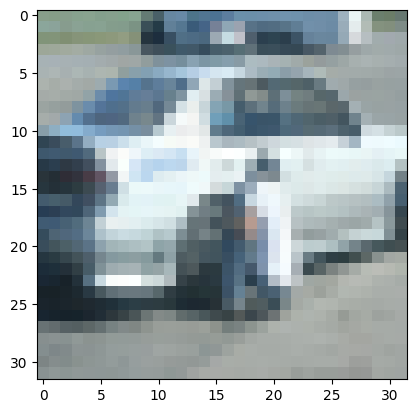

In [10]:
i = 30009
plt.imshow(X_train[i])
print(Y_train[i])

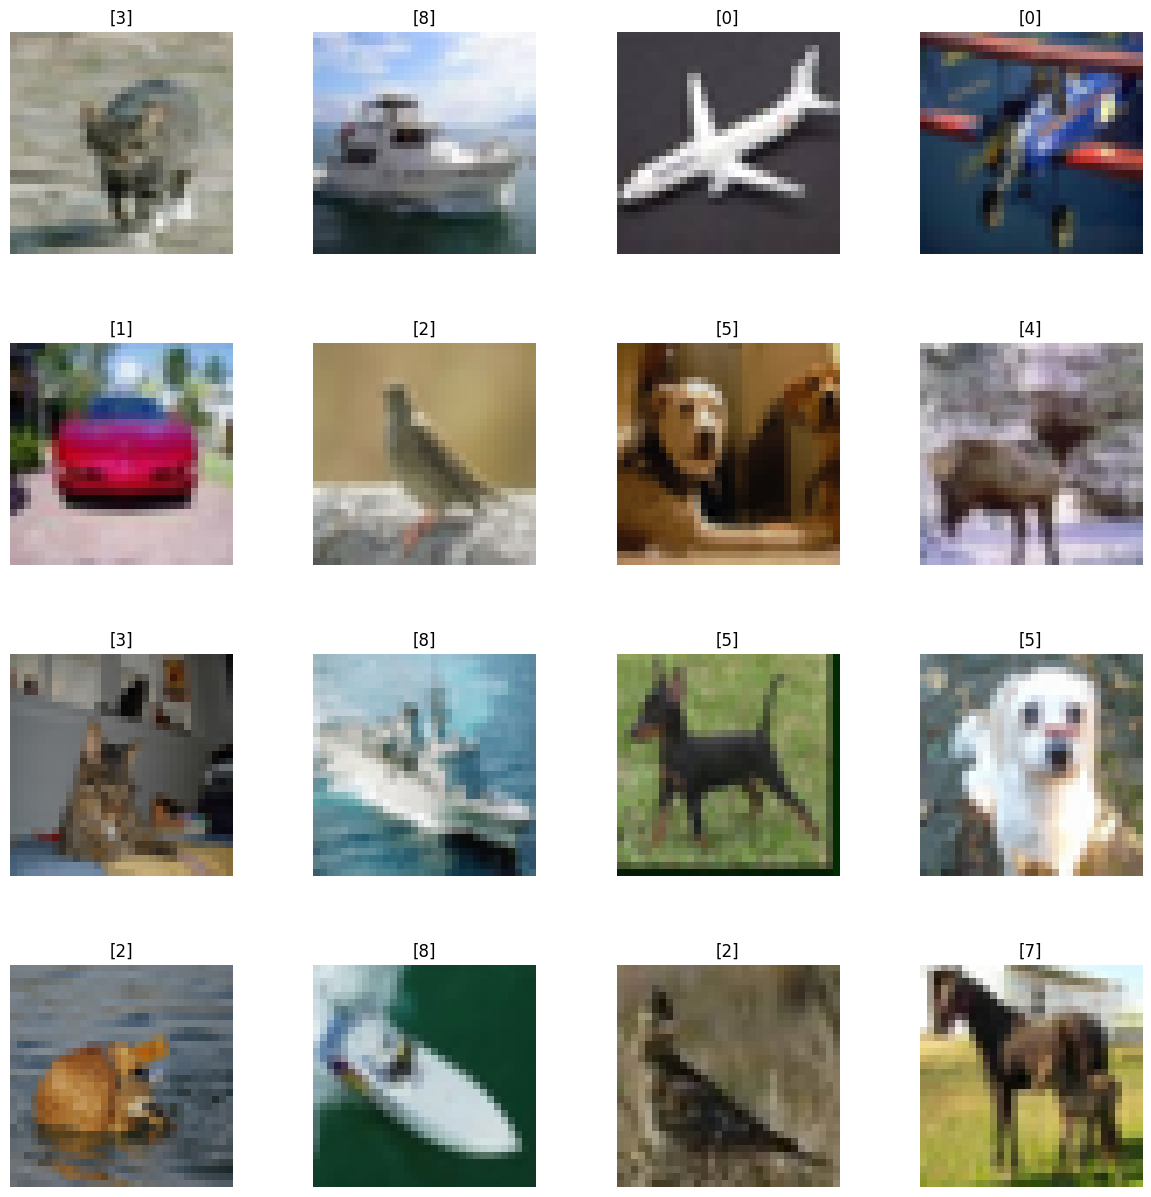

In [11]:
W_grid = 4
L_grid = 4
fig, axes = plt.subplots(L_grid, W_grid, figsize = (15,15))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(Y_train[index])
  axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [12]:
n_training

50000

In [13]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [14]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [15]:
num_cat = 10

In [16]:
Y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [17]:
import keras
Y_train = keras.utils.to_categorical(Y_train, num_cat)

In [18]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [19]:
Y_test = keras.utils.to_categorical(Y_test, num_cat)

In [20]:
Y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [21]:
X_train = X_train/255

In [22]:
X_test = X_test/255

In [23]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [24]:
X_train.shape

(50000, 32, 32, 3)

In [25]:
Input_shape = X_train.shape[1:]

In [26]:
Input_shape

(32, 32, 3)

In [27]:
Y_train.shape

(50000, 10)

In [28]:
cnn = tf.keras.Sequential()

cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (32, 32, 3) ))
cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))
cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Dense(1024, activation = 'relu'))

cnn.add(tf.keras.layers.Dense(10, activation = 'softmax'))

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

In [29]:
cnn.compile(optimizer = tf.keras.optimizers.legacy.RMSprop(0.0001, decay = 1e-6), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [31]:
history = cnn.fit(X_train, Y_train, batch_size = 512, epochs = 100)

Epoch 1/100
98/98 [==============================] - 3s 34ms/step - loss: 1.6917 - accuracy: 0.3888
Epoch 2/100
98/98 [==============================] - 3s 35ms/step - loss: 1.6267 - accuracy: 0.4089
Epoch 3/100
98/98 [==============================] - 3s 33ms/step - loss: 1.5712 - accuracy: 0.4265
Epoch 4/100
98/98 [==============================] - 3s 33ms/step - loss: 1.5270 - accuracy: 0.4459
Epoch 5/100
98/98 [==============================] - 3s 33ms/step - loss: 1.4889 - accuracy: 0.4603
Epoch 6/100
98/98 [==============================] - 3s 35ms/step - loss: 1.4626 - accuracy: 0.4720
Epoch 7/100
98/98 [==============================] - 3s 35ms/step - loss: 1.4257 - accuracy: 0.4847
Epoch 8/100
98/98 [==============================] - 4s 38ms/step - loss: 1.4010 - accuracy: 0.4963
Epoch 9/100
98/98 [==============================] - 3s 35ms/step - loss: 1.3692 - accuracy: 0.5084
Epoch 10/100
98/98 [==============================] - 4s 43ms/step - loss: 1.3428 - accuracy: 0.5164

In [32]:
evaluation = cnn.evaluate(X_test, Y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.7018 - accuracy: 0.7645
Test Accuracy: 0.7645000219345093


In [33]:
predicted_classes = np.argmax(cnn.predict(X_test), axis=-1)
predicted_classes

313/313 [==============================] - 1s 3ms/step


array([3, 8, 8, ..., 5, 1, 7])

In [34]:
Y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [35]:
Y_test = Y_test.argmax(1)

In [36]:
Y_test

array([3, 8, 8, ..., 5, 1, 7])

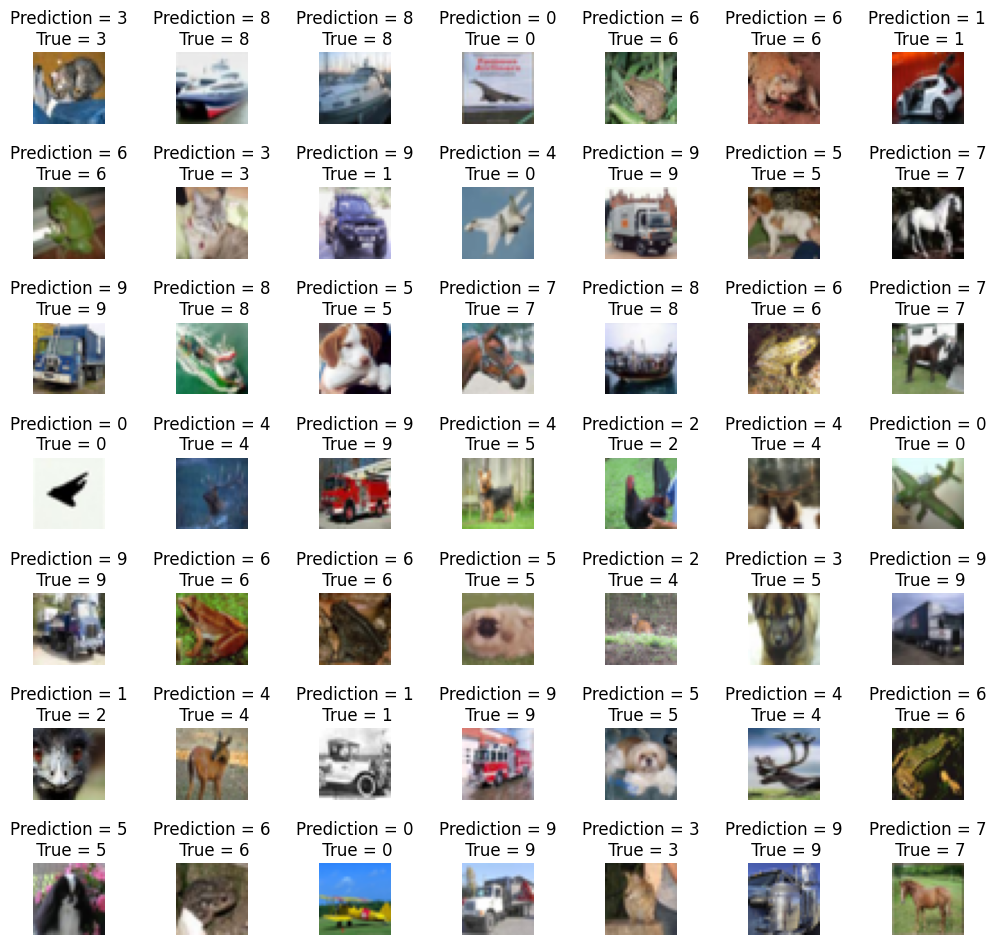

In [37]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], Y_test[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace=1)

<Axes: >

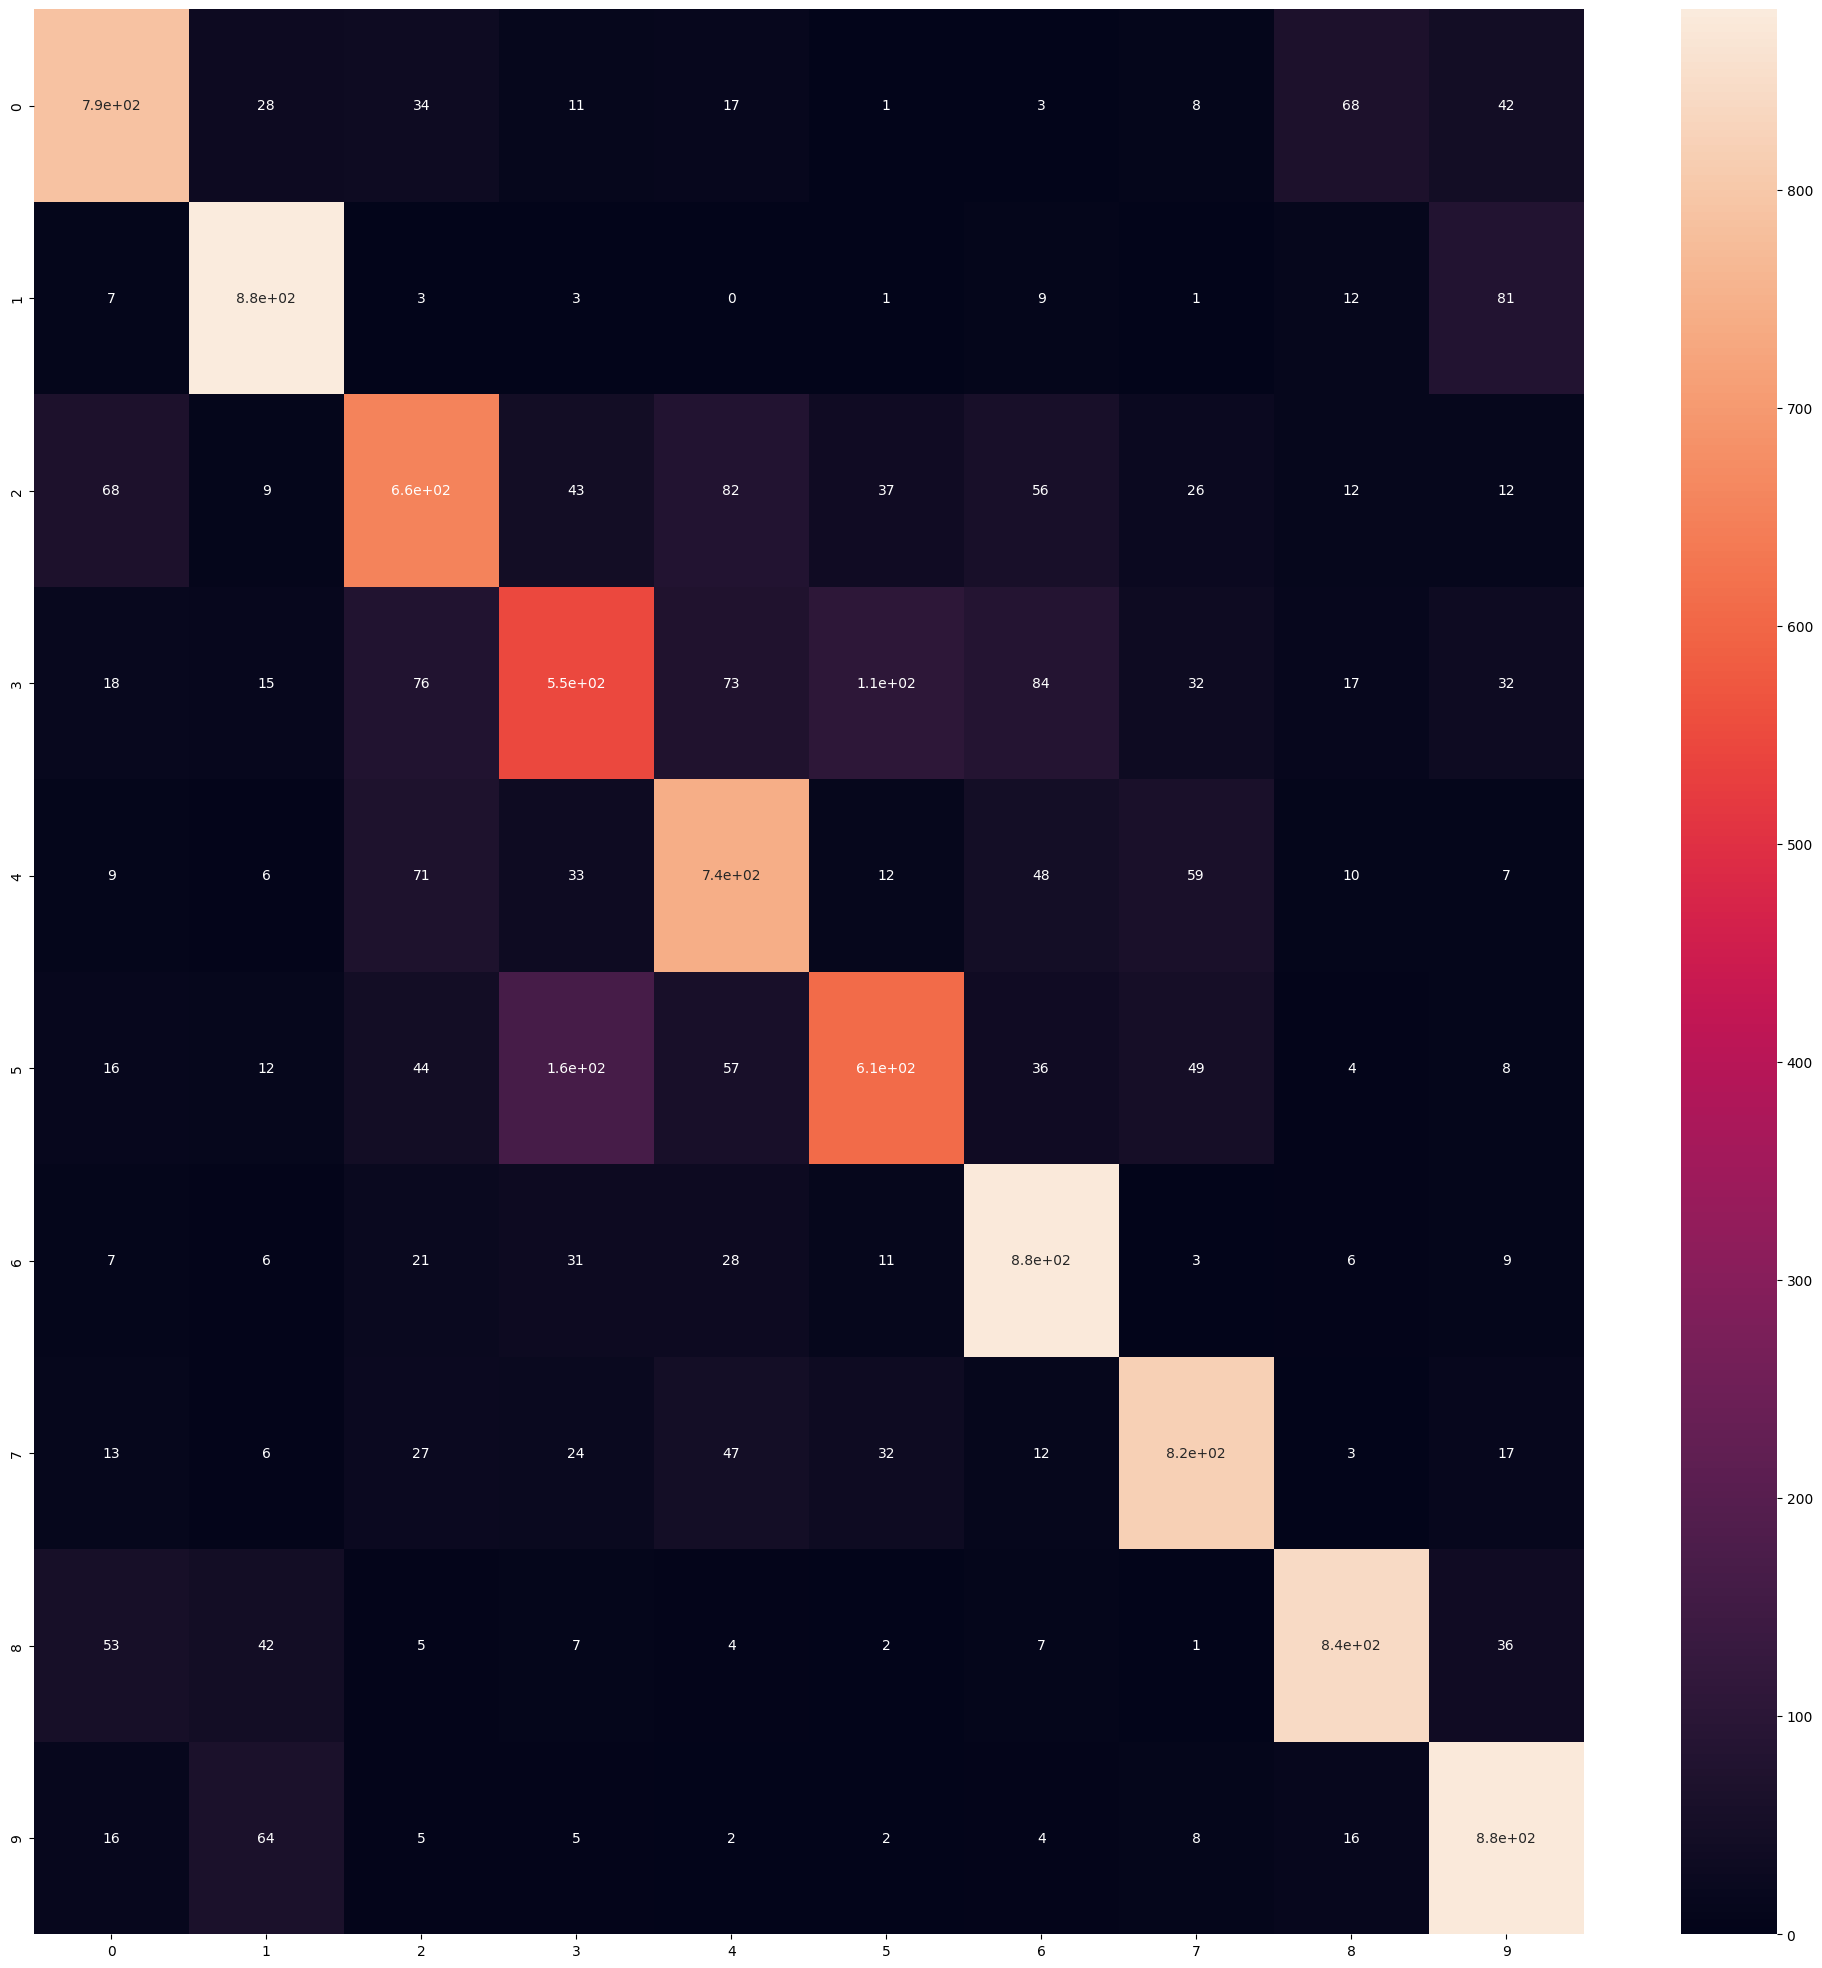

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predicted_classes)
cm
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot = True)